In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm


In [2]:
df=pd.read_csv("loan.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.shape

(614, 13)

In [7]:
df=df.dropna()

In [8]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [10]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [11]:
df=df.replace(to_replace='3+',value=4)

In [12]:
df['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

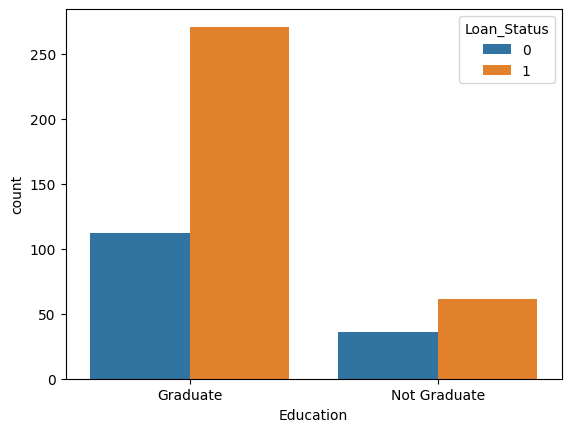

In [13]:
sns.countplot(x='Education',hue='Loan_Status',data=df)

In [14]:
df.replace({"Gender":{'Female':0,'Male':1}},inplace=True)
df.replace({"Married":{'No':0,'Yes':1}},inplace=True)
df.replace({"Education":{'Not Graduate':0,'Graduate':1}},inplace=True)
df.replace({"Self_Employed":{'No':0,'Yes':1}},inplace=True)
df.replace({"Property_Area":{'Rural':0,'Semiurban':1,'Urban':2}},inplace=True)

In [15]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [16]:
X=df.drop(['Loan_ID','Loan_Status'],axis=1)
Y=df['Loan_Status']

In [17]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)



In [23]:
model=LogisticRegression(max_iter=1000)

In [24]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [25]:
from sklearn.metrics import accuracy_score
chk=model.predict(X_train)
print(accuracy_score(chk,y_train))

0.8046875


In [26]:
chk=model.predict(X_test)
print(accuracy_score(chk,y_test))

0.8229166666666666


In [36]:
input_data=(1,1,0,1,0,3708,2569.0,173.0,360.0,1.0,2)
input_as_np=np.asarray(input_data)
inputdata=input_as_np.reshape(1,-1)
prediction=model.predict(inputdata)
print(prediction)

[1]


C:\Users\NIKIL HARI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [32]:
input_data=( 1,1,0,0,0,3000,1666.0,100.0,480.0,0.0,2)
input_as_np=np.asarray(input_data)
inputdata=input_as_np.reshape(1,-1)
prediction=model.predict(inputdata)
print(prediction)

[0]


C:\Users\NIKIL HARI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [30]:
print(X_train)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
337       1        1          2          1              1             2500   
358       1        1          0          0              0             3000   
405       0        0          0          1              0             4547   
248       1        1          1          1              0             2882   
457       1        1          0          1              0             3708   
..      ...      ...        ...        ...            ...              ...   
459       1        1          0          1              0             8334   
275       1        1          1          1              0             2750   
76        1        0          0          1              0             3750   
286       0        0          0          1              1             2600   
389       1        1          0          1              0             5488   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [31]:
print(y_train)

337    1
358    0
405    1
248    1
457    0
      ..
459    0
275    1
76     0
286    0
389    1
Name: Loan_Status, Length: 384, dtype: int64
